## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [9]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn  sklearn-pandas -q --user


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\paluv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [10]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

## Loading the dataset

In [11]:
#uncomment and run the following line if using Google Collab
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
df = pd.read_csv('Loan_Modelling.csv')

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Overview

* Observations
* Sanity checks

In [14]:
pd = df.copy()

In [15]:
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
df.tail

<bound method NDFrame.tail of         ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0       

In [17]:
df.shape

(5000, 14)

The dataset has 5000 rows and 14 columns.

In [58]:
df.info()
#df.select_dtypes('int').describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are 1 numerical and 13 categorical variables in the data.
The CC Avg data is encoded as numerical and rest of them are integers.

In [19]:
df.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The average age of the applicants is ~45 years. The average income of applicants with 20 years of experience is 73k annually.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [20]:
# defining the figure size
plt.figure(figsize=(15, 10))



<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [21]:
#defining the list of numerical features to plot
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

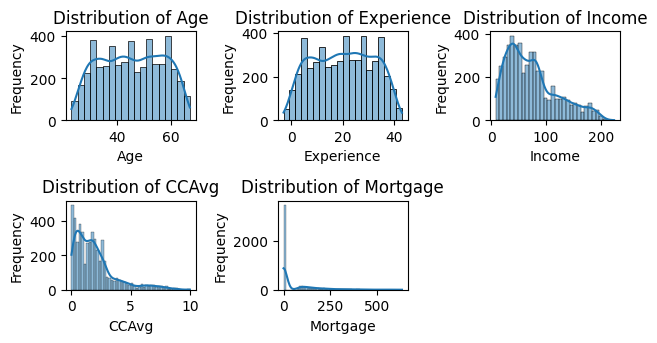

In [22]:
# plotting the histogram for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()


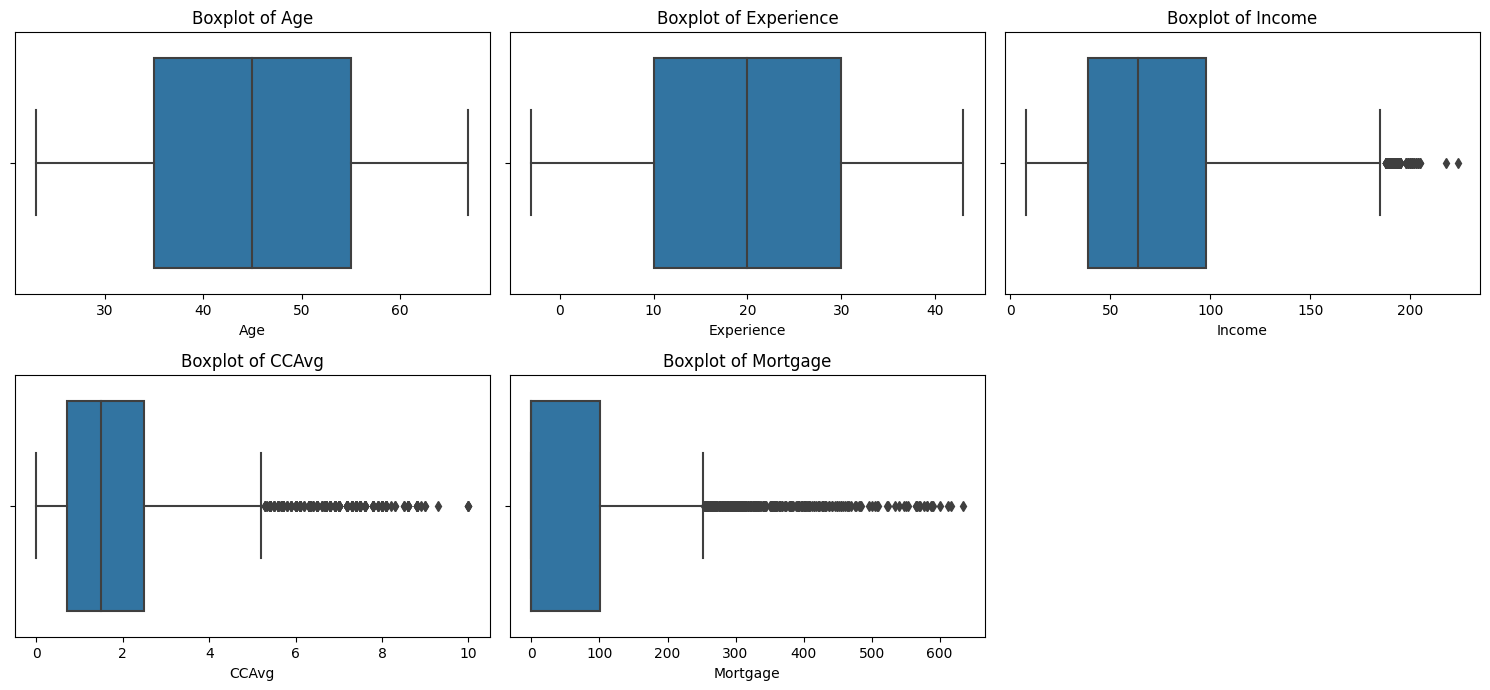

In [23]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


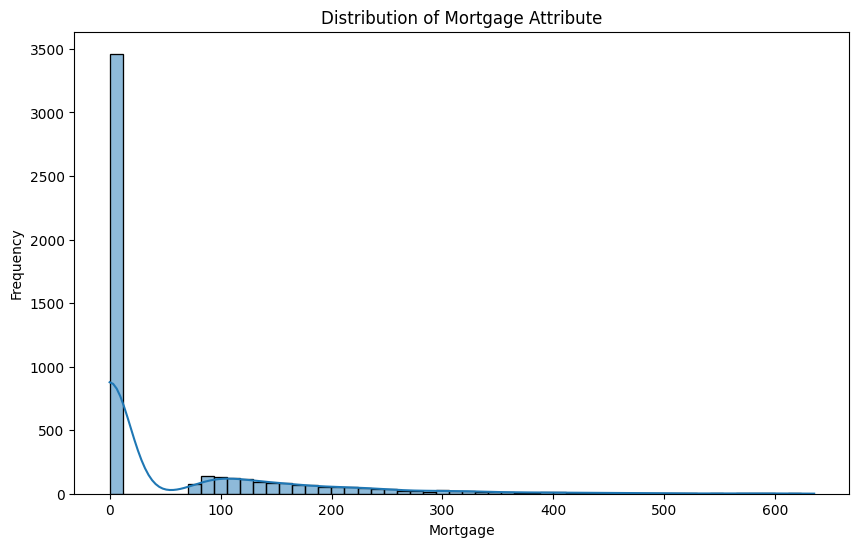

In [24]:
#checking the distribution of mortgage attribute
print(df['Mortgage'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Mortgage'], kde=True)
plt.title('Distribution of Mortgage Attribute')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.show()



*  The average distribution of mortgage attribute is ~56.5.





*  There are noticeable outliers in the distribution of mortgage attribute.


CreditCard
0    3530
1    1470
Name: count, dtype: int64


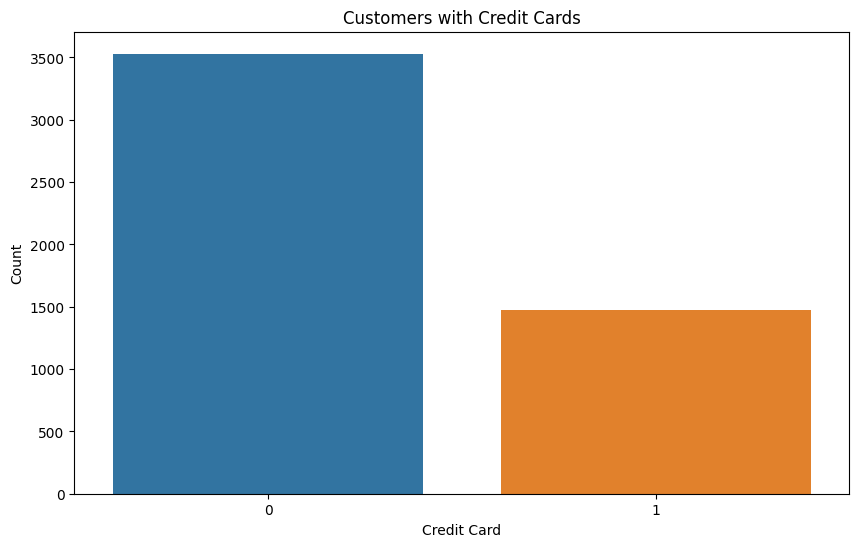

In [25]:
#Checking the customers have credit cards
print(df['CreditCard'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='CreditCard', data=df)
plt.title('Customers with Credit Cards')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()



*   There are 3530 customers have credit cards.




                          ID       Age  Experience    Income   ZIPCode  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.002240   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.030530   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.030456   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.030709   
ZIPCode             0.002240 -0.030530   -0.030456 -0.030709  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.027512   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.012188   
Education           0.021463  0.041334    0.013152 -0.187524 -0.008266   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.003614   
Personal_Loan      -0.024801 -0.007726   -0.007413  0.502462 -0.002974   
Securities_Account -0.016972 -0.000436   -0.001232 -0.002616  0.002422   
CD_Account         -0.006909  0.008043    0.010353  0.169738  0.021671   
Online             -0.002528  0.013702

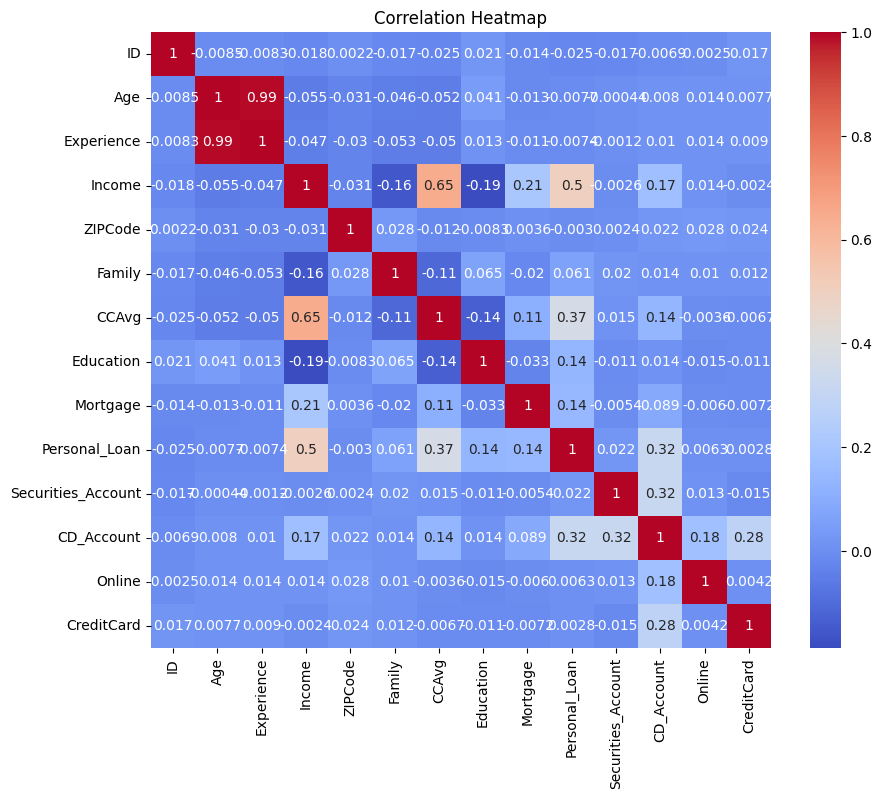

In [26]:
#Check the attributes that have a strong correlation with the target attribute (personal loan)
print(df.corr())
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64
Age
34    18
30    17
35    16
63    16
36    16
52    15
54    15
33    15
29    15
43    15
65    14
56    14
42    14
44    14
26    13
46    13
50    13
45    13
57    12
48    12
61    12
38    12
27    12
32    12
53    11
47    10
51    10
60    10
49    10
58    10
28     9
59     9
62     9
55     9
40     8
41     8
64     8
37     8
31     7
39     6
Name: count, dtype: int64


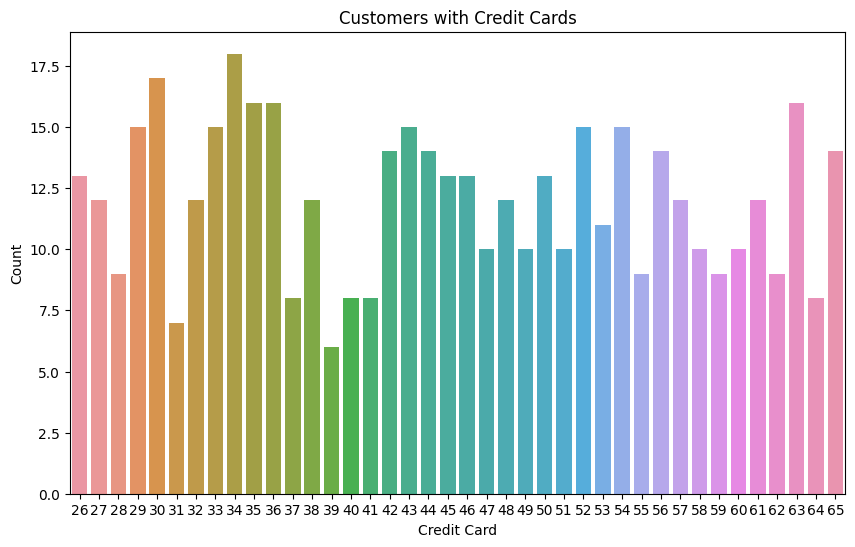

In [27]:
# checking customer's interest in purchasing a loan vary with their age
print(df['Age'].value_counts())
customers_interest_personal_loan = df[df['Personal_Loan'] == 1]
print(customers_interest_personal_loan['Age'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=customers_interest_personal_loan)
plt.title('Customers with Credit Cards')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()



*   A customers with an age of 35 years old have more credit cards in the data.


*   A customers with an age of 34 years old have more interested to purchase personal loan.





Education
1    2096
3    1501
2    1403
Name: count, dtype: int64


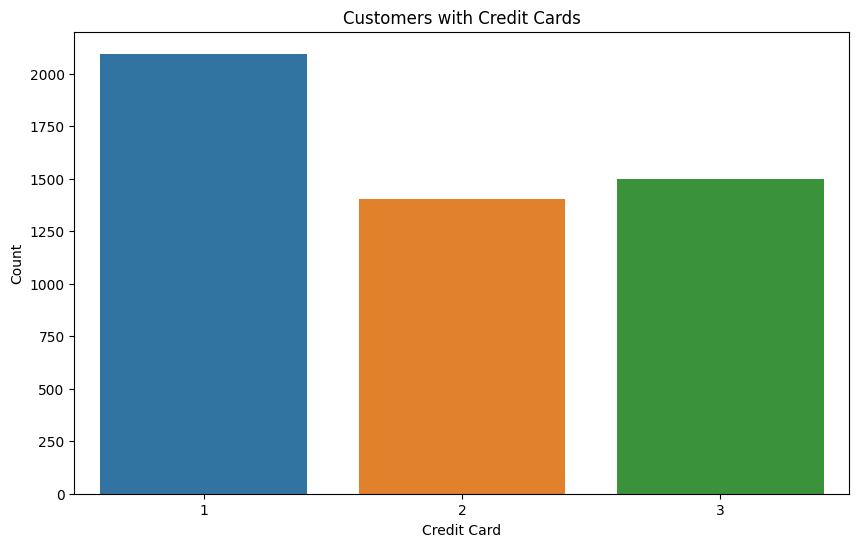

In [28]:
# Checking a customer's interest in purchasing a loan vary with their education
print(df['Education'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df)
plt.title('Customers with Credit Cards')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()

Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional


1.   There are people with an undergraduate degree has more credit cards(2096) than the people with graduate(1501) and advanced/professional degree(1403) based on the above data.




## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [29]:
#checking for mssing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no missig values in the dataset.

In [30]:
#Checking for duplicate values
df.duplicated().sum()

0

There are o duplicate values in the data.

In [31]:
# defining the explanatory (independent) and response (dependent) variables
X = df.drop(columns=['ID', 'Personal_Loan'])
y = df['Personal_Loan']

In [32]:
import pandas as pd # make sure you import pandas

X=pd.get_dummies(X, columns=X.filter(items=["age", "experience", "income", "cc_avg", "zipcode", "family", "mortgage", "education"]).columns.tolist(), drop_first=True)
X.head()



,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [33]:
#specifying the datatype of the independent variables data frame
X = X.astype(float)
X.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0
1,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0
2,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0
4,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# label encoding the response variable
y = y.map({'Yes': 1, 'No': 0})

y.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Personal_Loan, dtype: float64

In [35]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)
print(X_train.shape[0]/X.shape[0])
print(X_test.shape[0]/X.shape[0])
print("percentage of y_train")
print(y_train.shape[0]/y.shape[0])
print("percentage of y_test")
print(y_test.shape[0]/y.shape[0])


(4000, 12)
(1000, 12)
(4000,)
(1000,)
(5000, 12)
(5000,)
0.8
0.2
percentage of y_train
0.8
percentage of y_test
0.2


## Model Building

### Model Evaluation Criterion

*


### Model Building

In [37]:
#handle NaN values in y_train
y_train = y_train.fillna(0)



model0=DecisionTreeClassifier(random_state=1)
model0.fit(X_train,y_train)

# Creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

## Model Performance Improvement

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf








In [39]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))
    # Create the heatmap using seaborn
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="Blues",
        xticklabels=["No", "Yes"],
        yticklabels=["No", "Yes"],
    )
    # Set the title of the plot
    plt.title("Confusion Matrix")
    # Set the x-axis label
    plt.xlabel("Predicted")
    # Set the y-axis label
    plt.ylabel("Actual")
    plot_confusion_matrix(dtree1, X_train, y_train)

In [40]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

C:\Users\paluv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paluv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\paluv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined a

,Accuracy,Recall,Precision,F1
0,1.0,0.0,0.0,0.0


In [41]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [42]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:
            # Create a decision tree classifier with the current parameter values
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)



In [43]:
            # Calculate recall scores for training and test sets
            for train_recall_score, y_train_pred in zip([train_recall_score], [y_train_pred]):
            for test_recall_score,  y_test_pred   in zip([test_recall_score], [y_test_pred]):

            # Print the recall scores
            print(f"Max depth: {max_depth}, Max leaf nodes: {max_leaf_nodes}, Min samples split: {min_samples_split}")
            #print(f"Max depth: {max_depth}, Max leaf nodes: {max_leaf_nodes}, Min samples split: {min_samples_split}")
            print(f"Training recall score: {train_recall_score}")
            print(f"Test recall score: {test_recall_score}")
            print()

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

IndentationError: expected an indented block after 'for' statement on line 2 (3225579241.py, line 3)

In [ ]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

In [72]:
confusion_matrix_sklearn(model2, X_train, y_train)

NameError: name 'confusion_matrix_sklearn' is not defined

In [73]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

NameError: name 'model_performance_classification_sklearn' is not defined

## Model Performance Comparison and Final Model Selection

In [74]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

NameError: name 'decision_tree_default_perf_train' is not defined

In [75]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

NameError: name 'decision_tree_default_perf_test' is not defined

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___